<a href="https://colab.research.google.com/github/nhitheknee/Machine-Learning/blob/main/Multi_classification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from keras.datasets import mnist
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Load dataset and print shapes
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('x_train: ' + str(x_train.shape))     # x_train is (60000, 28x28)
print('y_train: ' + str(y_train.shape))     # y_train holds 60K labels from 0 to 9
print('x_test: ' + str(x_test.shape))       # x_test is (10000, 28x28)
print('y_test: ' + str(y_test.shape))       # y_test is (10000)

# Reshape 28x28 pixels into input vectors
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])       # x_train is (60000 x 784)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])         # x_test is (10000 x 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing data
x_train /= 255
x_test /= 255

# Insert x0 = 1 to each row
x_train = np.insert(x_train, 0, 1, axis=1)      # x_train is (60000 x 785)

# Parameters for gradient descent
alpha = 0.01    # learning rate
tol = 0.001     # tolerance value
n_epoch = 1000
k = 10          # number of classes
n_sample = x_train.shape[0]     # number of training sets (60000)
n_features = x_train.shape[1]   # number of features (785)

# Initialize theta as 0.01
theta_init = np.full([x_train.shape[1], k], 0.01)  # theta is (785 x 10)


def sigmoid_function(z):     # function to calc sigmoid
    sigmoid = 1/(1 + np.exp(-z))
    return sigmoid


def softmax_function(z):     # function to calc softmax
#    softmax = np.zeros((z.shape[0], z.shape[1]))
    for i in range(k):
        softmax = np.exp(z)/np.sum(np.exp(z))
    return softmax


# main section for gradient descent training
for cls in range(k):   # loop for each class
    theta = theta_init
    loss_values = []    
    gradient_values = []  
    print("Training for class ", str(cls))
    for epoch in range(n_epoch):
      for i in range(n_sample):       # loop for training data
          if y_train[i] == cls:       # represent labels y in one-hot vector
              y_label = 1
          else:
              y_label = 0

          for j in range(n_features):   # loop for each row
              # Loss function
              y_hat = sigmoid_function(np.dot(x_train[i, :], theta[:, cls]))
              cost = 1/n_sample * (-(np.sum(y_label * np.log(y_hat) + (1-y_label) * np.log(1 - y_hat))))
              loss_values.append(cost)

              # Gradient
              gradient = 1/n_sample * np.dot((y_hat - y_label), x_train[i, :])
              # gradient_values.append(gradient)

              # Update theta
              theta[:, cls] = theta[:, cls] - np.dot(alpha, gradient)

      # set stop point for training     
      if abs(cost - loss_values[-2]) < tol:
        break


x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)
Training for class  0
Training for class  1
Training for class  2
Training for class  3
Training for class  4
Training for class  5
Training for class  6
Training for class  7
Training for class  8
Training for class  9


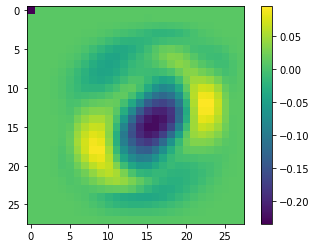

[-2.34310573e-01  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  9.99360307e-03  9.97392531e-03  9.98657105e-03
  9.99944046e-03  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  9.99970972e-03  9.99855509e-03  9.96052706e-03
  9.90487653e-03  9.84997142e-03  9.79351599e-03  9.70126547e-03
  9.67740991e-03  9.75391338e-03  9.65722844e-03  9.42519399e-03
  9.47158038e-03  9.47470346e-03  9.62495124e-03  9.75745657e-03
  9.80944289e-03  9.83482512e-03  9.92784006e-03  9.96528898e-03
  9.99038463e-03  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  9.99901145e-03
  1.00062295e-02  9.99218

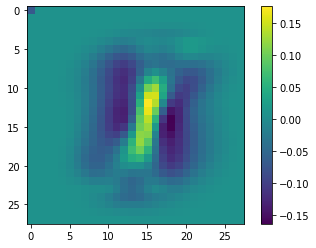

[-6.89971871e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  9.99319848e-03  9.97406958e-03  9.98771745e-03
  9.99948823e-03  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  9.99988088e-03  9.99952077e-03  9.98999271e-03
  9.97106827e-03  9.90355386e-03  9.87705078e-03  9.82350424e-03
  9.78196217e-03  9.80718400e-03  9.74247974e-03  9.76577914e-03
  9.79119275e-03  9.56216314e-03  9.72071992e-03  9.82951261e-03
  9.84247934e-03  9.85243799e-03  9.93000049e-03  9.96867282e-03
  9.99290653e-03  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  9.99984951e-03
  9.99990682e-03  9.99405

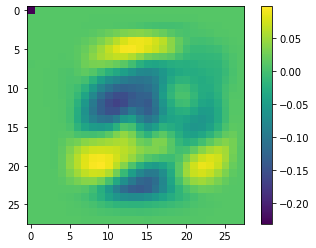

[-2.31399949e-01  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  9.98928515e-03  1.00337960e-02  1.00637171e-02
  1.00026549e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  9.99906499e-03  9.99628705e-03  9.93439713e-03
  9.84240139e-03  9.78828812e-03  9.65184182e-03  9.38237227e-03
  9.18650807e-03  9.04797433e-03  9.11871600e-03  9.12342132e-03
  9.20147244e-03  9.55374229e-03  9.37367827e-03  9.52146086e-03
  9.64703663e-03  9.71592669e-03  9.88283541e-03  9.94374322e-03
  9.98167102e-03  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  9.99881118e-03
  9.99839035e-03  9.96652

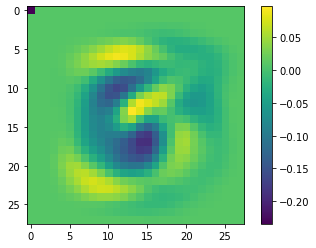

[-2.34303766e-01  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  9.99077958e-03  9.96978120e-03  9.98883936e-03
  9.99953497e-03  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  9.99995636e-03  9.99961949e-03  9.97679950e-03
  9.94557572e-03  9.91517945e-03  9.90726868e-03  9.87145658e-03
  9.81151203e-03  9.80519298e-03  9.74031583e-03  9.66781716e-03
  9.65244022e-03  9.64665216e-03  9.79544194e-03  9.88108955e-03
  9.88277112e-03  9.88310544e-03  9.94520252e-03  9.97278527e-03
  9.99291829e-03  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  9.99971430e-03
  9.99949742e-03  9.99485

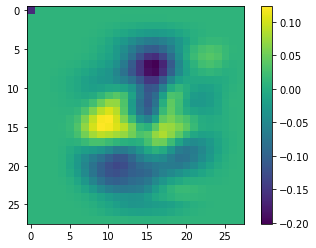

[-1.61100992e-01  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  9.98195550e-03  9.93526405e-03  9.97192970e-03
  9.99883040e-03  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  9.99865674e-03  9.99447981e-03  9.89343524e-03
  9.74593227e-03  9.64797676e-03  9.52074881e-03  9.04385254e-03
  8.74625002e-03  8.66776418e-03  8.76098875e-03  8.86027465e-03
  8.99855302e-03  8.98069354e-03  9.26897497e-03  9.58247550e-03
  9.68991701e-03  9.74010325e-03  9.86139943e-03  9.90530730e-03
  9.97282873e-03  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  9.99825105e-03
  9.99644366e-03  9.96840

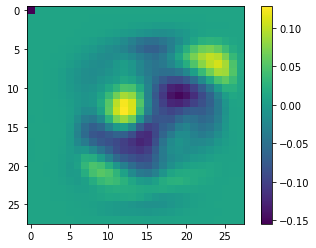

[-0.15436515  0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.00999238  0.00997579  0.00999163  0.00999965  0.01
  0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.00999986  0.0099993   0.00997465
  0.0099402   0.00991559  0.00990668  0.00984391  0.00978735  0.00976188
  0.00965396  0.0095597   0.0095521   0.00953994  0.00969936  0.00980326
  0.00981704  0.00984659  0.00993884  0.00996997  0.00999136  0.01
  0.01        0.01        0.01        0.01        0.01        0.00999906
  0.00999832  0.00999212  0.00999425  0.00993328  0.00978617  0.00954961
  0.00918394  0.0086327   0.00787933  0.0065982   0.00522748  0.00335666
  0.00209821  0.00144469  0.00221073  0.00349774  0.00527317  0.0073265
  0.00862322  0.00936874  0.00976457  0.00990864  0.00998581  0.01
  0.01        0.01   

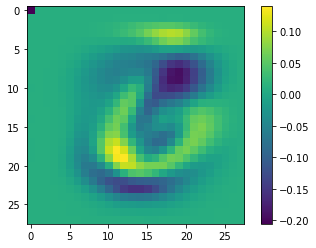

[-2.05992370e-01  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00374479e-02  1.00562317e-02  9.97132693e-03
  9.99880529e-03  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00025404e-02  1.00095022e-02  1.01489387e-02
  1.03919398e-02  1.06277320e-02  1.08510998e-02  1.13007299e-02
  1.18058726e-02  1.20846243e-02  1.19123471e-02  1.16086103e-02
  1.13659243e-02  1.11227889e-02  1.13173716e-02  1.12446061e-02
  1.09835512e-02  1.08058753e-02  1.04023408e-02  1.01825709e-02
  1.00686479e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00058219e-02
  9.99822349e-03  1.01003

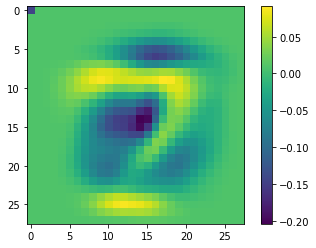

[-0.14348936  0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.00999261  0.00997184  0.00998668  0.00999944  0.01
  0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.00999988  0.00999895  0.00995292
  0.00989256  0.00985783  0.00982512  0.00974855  0.00963472  0.00960781
  0.00962971  0.00957544  0.00956134  0.00954474  0.00972875  0.00984918
  0.00987104  0.00988165  0.00994608  0.00996811  0.00998773  0.01
  0.01        0.01        0.01        0.01        0.01        0.00999995
  0.00999883  0.00999094  0.00999219  0.00987052  0.00960726  0.00929275
  0.00884264  0.00809239  0.00738835  0.00639373  0.00574295  0.00483417
  0.0043302   0.00380538  0.0043989   0.00550766  0.00694447  0.00848523
  0.00925238  0.00965207  0.00988915  0.00996474  0.00999831  0.01
  0.01        0.01  

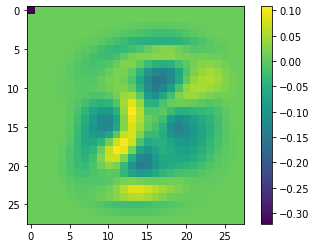

[-3.21370315e-01  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  9.98987655e-03  9.96362022e-03  9.98418374e-03
  9.99934099e-03  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  9.99979896e-03  9.99913531e-03  9.97920893e-03
  9.94580994e-03  9.89534808e-03  9.85653037e-03  9.76928436e-03
  9.69197672e-03  9.64574184e-03  9.55118726e-03  9.46712170e-03
  9.45492191e-03  9.40061779e-03  9.59128165e-03  9.74685376e-03
  9.80000572e-03  9.83001769e-03  9.92116881e-03  9.95716079e-03
  9.98741450e-03  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  9.99917660e-03
  9.99933463e-03  9.98901

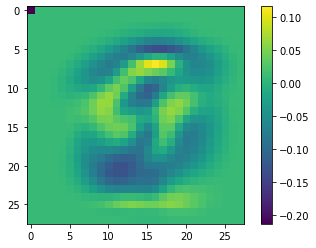

[-2.13113081e-01  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  9.98692737e-03  9.95441666e-03  9.98112810e-03
  9.99921367e-03  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  9.99943385e-03  9.99757921e-03  9.94505555e-03
  9.86971999e-03  9.82711731e-03  9.80213555e-03  9.67253806e-03
  9.52529457e-03  9.45125557e-03  9.39149868e-03  9.34266574e-03
  9.36810544e-03  9.32132040e-03  9.53092230e-03  9.71290554e-03
  9.78007990e-03  9.82570147e-03  9.92332036e-03  9.95465277e-03
  9.98381667e-03  1.00000000e-02  1.00000000e-02  1.00000000e-02
  1.00000000e-02  1.00000000e-02  1.00000000e-02  9.99845028e-03
  9.99856527e-03  9.98582

In [ ]:
# Plot theta 
for cls in range(k):
  plt.imshow(theta[0:784, cls].reshape(28, 28))
  plt.colorbar()
  plt.show()

  print(theta[:, cls])

In [ ]:
# Testing section using trained model
print(x_test.shape[0], x_test.shape[1])
x_test = np.insert(x_test, 0, 1, axis=1)

for cls in range(k):
    x_test = x_test[:, 0:785]
    correct_predictions = 0
    for i in range(x_test.shape[0]):
        z_test = sigmoid_function(np.dot(x_test[i, :], theta[:, cls]))  # y_hat passed through sigmoid
#       predictions = softmax_function(z_test)
        if y_test[i] == cls:  # represent y_test as one hot vector
            y_test[i] = 1
        else:
            y_test[i] = 0

        # set prediction boundary and calc accurate predictions
        if np.logical_and(z_test >= 0.5, y_test[i] ==1):
            correct_predictions += 1
        if np.logical_and(z_test < 0.5, y_test[i] == 0):
            correct_predictions += 1

    accuracy_percentage = (correct_predictions/x_test.shape[0]) * 100
    print("Accuracy for class ", str(cls), "=", accuracy_percentage)




10000 785
Accuracy for class  0 = 94.59
Accuracy for class  1 = 89.82
Accuracy for class  2 = 95.65
Accuracy for class  3 = 94.51
Accuracy for class  4 = 96.46000000000001
Accuracy for class  5 = 96.65
Accuracy for class  6 = 93.07
Accuracy for class  7 = 93.46
Accuracy for class  8 = 98.78
Accuracy for class  9 = 99.25
